In [ ]:
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping


# mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')
 

# Set the path to the folder containing the subfolders "crack" and "no crack"
folder_path = '/content/drive/My Drive/Colab Notebooks/CNN'

Mounted at /content/drive


Found 1032 images belonging to 2 classes.


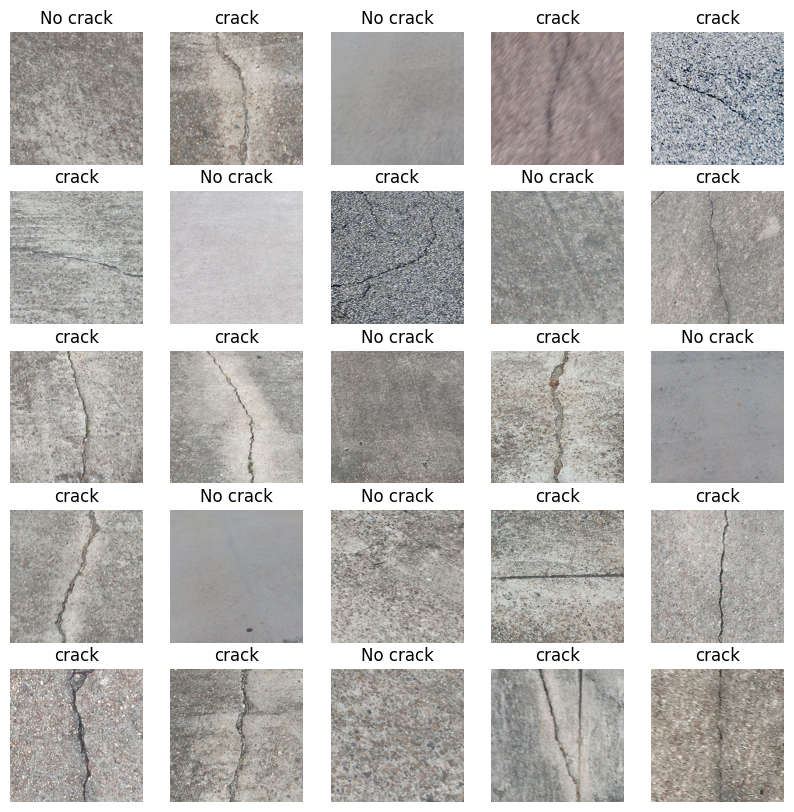

In [ ]:
# Create an ImageDataGenerator to load images from the folder
datagen = ImageDataGenerator(rescale=1./255)

# Generate a batch of 9 images
batch_size = 25
data = datagen.flow_from_directory(
    folder_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
)

# Get the images and labels from the batch
images, labels = next(data)

# Create a figure and plot the images
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()
for i in range(batch_size):
    img = images[i]
    label = labels[i]
    title = 'No crack' if label == 1 else 'crack'
    axs[i].imshow(img)
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

In [ ]:
# Define the input shape for the CNN
input_shape = (256, 256, 3)

# Define the batch size and number of epochs
batch_size = 32
epochs = 25
 
# Split the dataset into training and testing sets
train_ratio = 0.8
test_ratio = 0.2

# Create an ImageDataGenerator to perform data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=test_ratio
)

# Generate the training and validation data
train_data = datagen.flow_from_directory(
    folder_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)
val_data = datagen.flow_from_directory(
    folder_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Build the CNN architecture  (3 layers)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
# Train the model 
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    epochs=epochs,
    validation_data=val_data,
    validation_steps=val_data.samples // batch_size,   
)


Found 827 images belonging to 2 classes.
Found 205 images belonging to 2 classes.
Epoch 1/25
25/25 [==============================] - 21s 778ms/step - loss: 1.0884 - accuracy: 0.5509 - val_loss: 0.6797 - val_accuracy: 0.6042
Epoch 2/25
25/25 [==============================] - 19s 763ms/step - loss: 0.6774 - accuracy: 0.5937 - val_loss: 0.6718 - val_accuracy: 0.5990
Epoch 3/25
25/25 [==============================] - 17s 697ms/step - loss: 0.6827 - accuracy: 0.5937 - val_loss: 0.6791 - val_accuracy: 0.5938
Epoch 4/25
25/25 [==============================] - 19s 742ms/step - loss: 0.6779 - accuracy: 0.5937 - val_loss: 0.6643 - val_accuracy: 0.6146
Epoch 5/25
25/25 [==============================] - 17s 695ms/step - loss: 0.6790 - accuracy: 0.6000 - val_loss: 0.6526 - val_accuracy: 0.5938
Epoch 6/25
25/25 [==============================] - 18s 716ms/step - loss: 0.6355 - accuracy: 0.5937 - val_loss: 0.6585 - val_accuracy: 0.5781
Epoch 7/25
25/25 [==============================] - 19s 759m

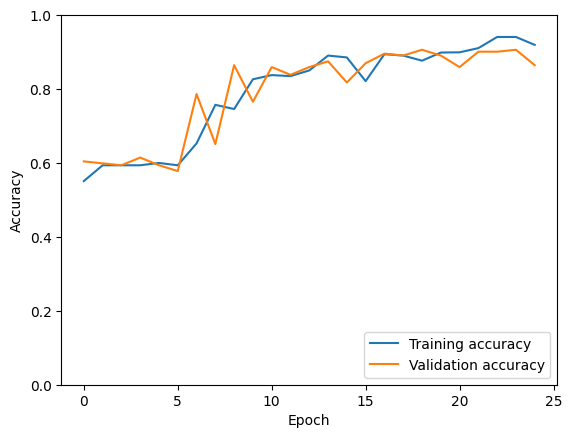

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 84ms/step


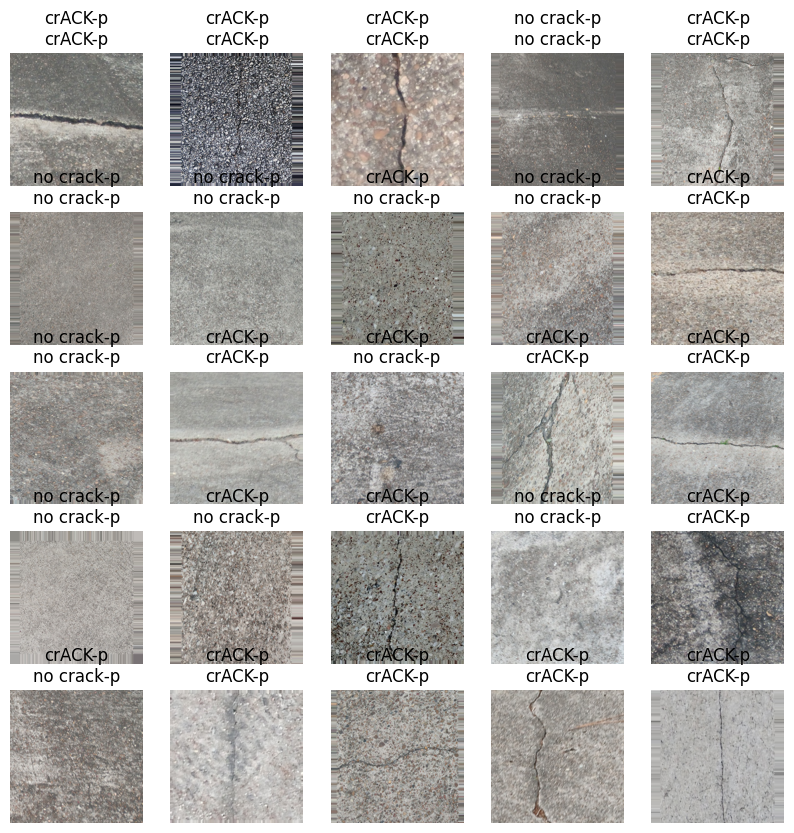

In [ ]:
# Generate a batch of 25 test images from the validation set
test_images, test_labels = val_data.next()
test_labels = test_labels.astype(int)

# Predict the class probabilities for the test images
predictions = model.predict(test_images)

# Convert the probabilities to class labels
predicted_labels = tf.round(predictions).numpy().astype(int)

# Define the class names
class_names = ['crACK-p', 'no crack-p']

# Show the images and predicted class names
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(class_names[predicted_labels[i][0]] + '\n' + class_names[test_labels[i]])
    plt.axis('off')
plt.show()
